# Michael Bell

## How do changes in population affect the Housing Price Index across Canada?

    I will be looking at how changes in the populations of various regions across Canada affect the Housing Price Index of those same regions. I suspect that there will be a close connection between the two, with growing populations increasing the price of housing and thus the HPI for the region.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
popIncFile = ("../data/raw/population-by-region-1946-2022 (1).csv")
canHPIFile = ("../data/raw/hpi_by_region.csv")

In [3]:
popDataSet = pd.read_csv(popIncFile)
canHPIDataSet = pd.read_csv(canHPIFile)

In [4]:
canHPIDataSet.head()

,Unnamed: 0,Type,Month-year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,...,Manitoba,Saskatchewan,Alberta,British Columbia,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia",Month-Year,year,month
0,0,House and Land,Jan-81,38.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,90.5,128.7,1981-01-01,1981,1
1,1,House and Land,Feb-81,38.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.1,1981-02-01,1981,2
2,2,House and Land,Mar-81,39.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.8,1981-03-01,1981,3
3,3,House and Land,Apr-81,39.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,130.8,1981-04-01,1981,4
4,4,House and Land,May-81,40.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,132.5,1981-05-01,1981,5


In [5]:
canHPIDataSet.tail()

,Unnamed: 0,Type,Month-year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,...,Manitoba,Saskatchewan,Alberta,British Columbia,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia",Month-Year,year,month
1489,1489,Land only,Feb-22,116.1,102.8,102.4,103.1,103.5,102.5,119.0,...,110.2,100.8,103.7,119.7,118.6,120.9,108.7,2022-02-01,2022,2
1490,1490,Land only,Mar-22,116.5,102.8,102.4,104.5,103.5,102.5,120.5,...,110.4,101.1,104.6,120.2,118.6,121.3,111.4,2022-03-01,2022,3
1491,1491,Land only,Apr-22,116.7,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,104.8,120.6,118.6,121.7,111.4,2022-04-01,2022,4
1492,1492,Land only,May-22,116.8,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,105.4,120.6,118.6,121.7,111.4,2022-05-01,2022,5
1493,1493,Land only,Jun-22,117.0,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,106.0,120.8,118.6,121.9,111.4,2022-06-01,2022,6


In [6]:
canHPIDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1494 non-null   int64  
 1   Type                                   1494 non-null   object 
 2   Month-year                             1494 non-null   object 
 3   Canada                                 1494 non-null   float64
 4   Atlantic Region                        1314 non-null   float64
 5   Newfoundland and Labrador              1314 non-null   float64
 6   Prince Edward Island                   990 non-null    float64
 7   Nova Scotia                            1314 non-null   float64
 8   New Brunswick                          1314 non-null   float64
 9   Quebec                                 1314 non-null   float64
 10  Quebec City, Quebec                    1494 non-null   float64
 11  Sher

### Initial thoughts on the HPI data

    Early records appear to be incomplete, however many columns are without any Null entries, and many are close, so I believe with mild trimming there should be no problem using this data to compare with the population data. It's also divided into many specific regions, which should be useful in getting direct comparisons.

In [7]:
popDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   REF_DATE             3839 non-null   object
 1   GEO                  3839 non-null   object
 2   DGUID                3678 non-null   object
 3   VECTOR               3839 non-null   object
 4   COORDINATE           3839 non-null   int64 
 5   Population estimate  3839 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 180.1+ KB


In [8]:
popDataSet

,REF_DATE,GEO,DGUID,VECTOR,COORDINATE,Population estimate
0,Jan-46,Canada,2016A000011124,v1,1,12188000
1,Apr-46,Canada,2016A000011124,v1,1,12241000
2,Jul-46,Canada,2016A000011124,v1,1,12316000
3,Oct-46,Canada,2016A000011124,v1,1,12393000
4,Jan-47,Canada,2016A000011124,v1,1,12450000
...,...,...,...,...,...,...
3834,Apr-22,Alberta,2016A000248,v15,10,4500917
3835,Apr-22,British Columbia,2016A000259,v3,11,5286528
3836,Apr-22,Yukon,2016A000260,v4,12,43249
3837,Apr-22,Northwest Territories,2016A000261,v6,14,45607


### Initial thoughts on the population data

    There is very little missing data here, and it is divided by province/territory, which should pair well with the HPI data that is divided among similar lines. The HPI data does not include the territories, however, so the population data for those will not be useful to me.

# Exploring the Data, Graphically!

[Text(0.5, 1.0, 'HPI Over Years, Canada-Wide')]

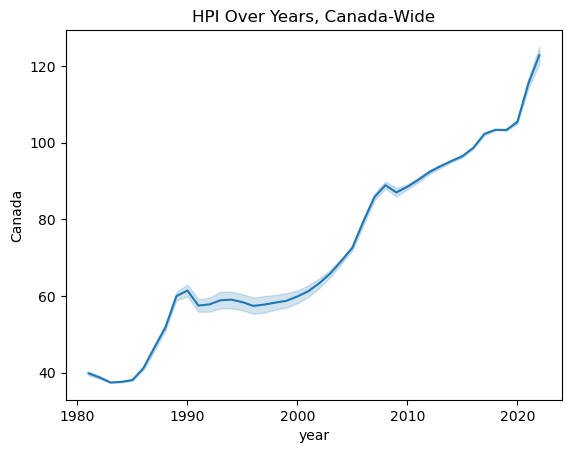

In [9]:
sns.lineplot(data=canHPIDataSet, x="year", y="Canada").set(title="HPI Over Years, Canada-Wide")

### Comments

    This shows the general trend of the HPI scores Canada wide, from the 1980s to 2020. We can see an incline that seems to go through slower periods, but inevitably spikes upwards again. Next, I'd like to see how the various regions compare to each other.

[Text(0.5, 1.0, 'Correlation Matrix of HPI Scores Across Canada')]

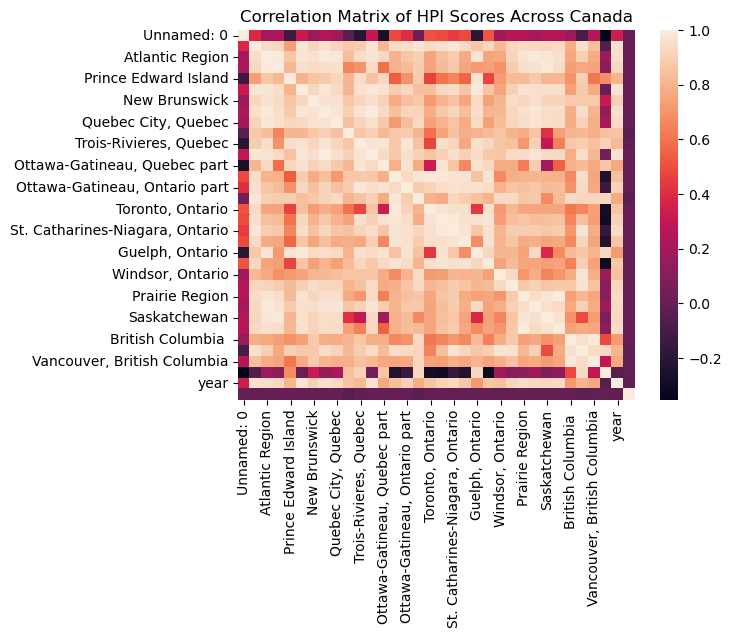

In [10]:
sns.heatmap(canHPIDataSet.corr()).set(title="Correlation Matrix of HPI Scores Across Canada")

### Comments

    The correlation matrix of HPI scores suggests that HPI scores grow fairly consistently across all regions. This should allow me to somewhat explain the change in HPI in all the regions by investigating one area closer. 

[Text(0.5, 1.0, 'HPI Over Years in Quebec')]

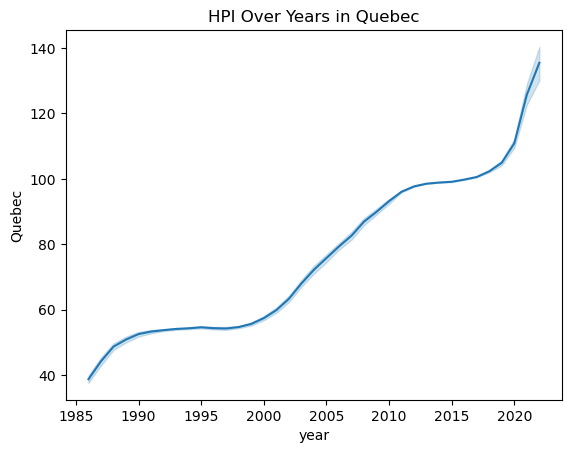

In [11]:
sns.lineplot(data=canHPIDataSet, x="year", y="Quebec").set(title="HPI Over Years in Quebec")

### Comments

    We can see that Quebec follows a similar, although smoother pattern in HPI scores. This most likely means the jagged line in the first line plot comes from significant differences during certain short periods, that overall balance out to increase similarly. Next, I'd like to see how Quebec's population growth compares.

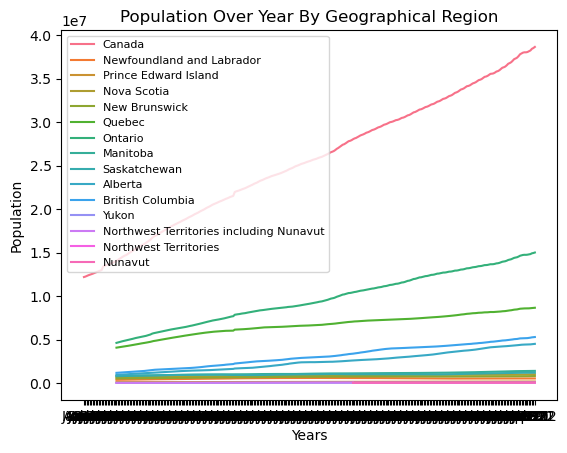

In [12]:
sns.lineplot(data=popDataSet, x="REF_DATE", y="Population estimate", hue="GEO").set(title="Population Over Year By Geographical Region", ylabel="Population", xlabel="Years")
plt.legend(fontsize='8')

### Comments

    As seen here, the population growth of each region is fairly linear. This is an interesting discover, and will warrant further investigation. 

# The Analysis Pipeline

    Now that the data has been loaded and explored, I have an idea of where I'd like to take it, and also how I'd like to cut it down. 
    
    From the population data, I just want to take the REF_DATE, GEO, and Population estimate columns, as the rest of the data is not going to get used by me. To match this, I'll cut out the more specific regions from the HPI data, leaving me with larger regions to look at the scores and population for.

In [13]:
cleaning_popData = popDataSet.drop(['DGUID', 'VECTOR', 'COORDINATE'], axis=1)
cleaning_popData

,REF_DATE,GEO,Population estimate
0,Jan-46,Canada,12188000
1,Apr-46,Canada,12241000
2,Jul-46,Canada,12316000
3,Oct-46,Canada,12393000
4,Jan-47,Canada,12450000
...,...,...,...
3834,Apr-22,Alberta,4500917
3835,Apr-22,British Columbia,5286528
3836,Apr-22,Yukon,43249
3837,Apr-22,Northwest Territories,45607


In [14]:
cleaned_HPIData = canHPIDataSet.drop(['Atlantic Region', 'Ottawa-Gatineau, Ontario part', 'Toronto, Ontario', 'Quebec City, Quebec', 'Sherbrooke, Quebec', 'Trois-Rivieres, Quebec', 'Montreal, Quebec', 'Ottawa-Gatineau, Quebec part', 'Hamilton, Ontario', 'St. Catharines-Niagara, Ontario', 'Kitchener-Cambridge-Waterloo, Ontario', 'Guelph, Ontario', 'London, Ontario', 'Windsor, Ontario', 'Greater Sudbury, Ontario 12', 'Prairie Region', 'Kelowna, British Columbia', 'Vancouver, British Columbia', 'Victoria, British Columbia', 'year', 'month'], axis=1)
cleaned_HPIData

,Unnamed: 0,Type,Month-year,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,"Oshawa, Ontario",Manitoba,Saskatchewan,Alberta,British Columbia,Month-Year
0,0,House and Land,Jan-81,38.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-01-01
1,1,House and Land,Feb-81,38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-02-01
2,2,House and Land,Mar-81,39.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-03-01
3,3,House and Land,Apr-81,39.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-04-01
4,4,House and Land,May-81,40.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1489,Land only,Feb-22,116.1,102.4,103.1,103.5,102.5,119.0,120.4,114.7,110.2,100.8,103.7,119.7,2022-02-01
1490,1490,Land only,Mar-22,116.5,102.4,104.5,103.5,102.5,120.5,120.5,114.7,110.4,101.1,104.6,120.2,2022-03-01
1491,1491,Land only,Apr-22,116.7,102.4,104.5,103.5,102.5,120.5,120.5,114.7,110.6,101.3,104.8,120.6,2022-04-01
1492,1492,Land only,May-22,116.8,102.4,104.5,103.5,102.5,120.5,120.7,114.7,110.6,101.3,105.4,120.6,2022-05-01


### Further Cleaning

    Now that I've cut out the unrelated columns, it's time to cut down on the length. The HPI scores only go back to January 1981, while the population data goes back to January 1946, leaving me with 35 rows of useless information. Once this is done, the data sets will be the perfect size!

In [15]:
cleaned_popData = cleaning_popData.iloc[1556:]
cleaned_popData

,REF_DATE,GEO,Population estimate
1556,Jan-81,Canada,24665355
1557,Jan-81,Newfoundland and Labrador,573420
1558,Jan-81,Prince Edward Island,123315
1559,Jan-81,Nova Scotia,853673
1560,Jan-81,New Brunswick,704763
...,...,...,...
3834,Apr-22,Alberta,4500917
3835,Apr-22,British Columbia,5286528
3836,Apr-22,Yukon,43249
3837,Apr-22,Northwest Territories,45607


In [16]:
cleaned_popData.to_csv('../data/processed/ProcessedPopData.csv')
cleaned_HPIData.to_csv('../data/processed/ProcessedHPIData.csv')

In [2]:
import project_functions3 as p3
fdf = p3.load_and_process("../data/raw/")
fdf.head(10)


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

# The Research Analysis

    Armed with my discoveries from exploring the data, and a set of trimmed and cleaned data, I can now pursue answers to whether or not my hypothesis is correct. I'd like to begin by taking a look at a new correlation matrix, based on my final data set.

[Text(0.5, 1.0, 'Final Dataset Correlation Matrix')]

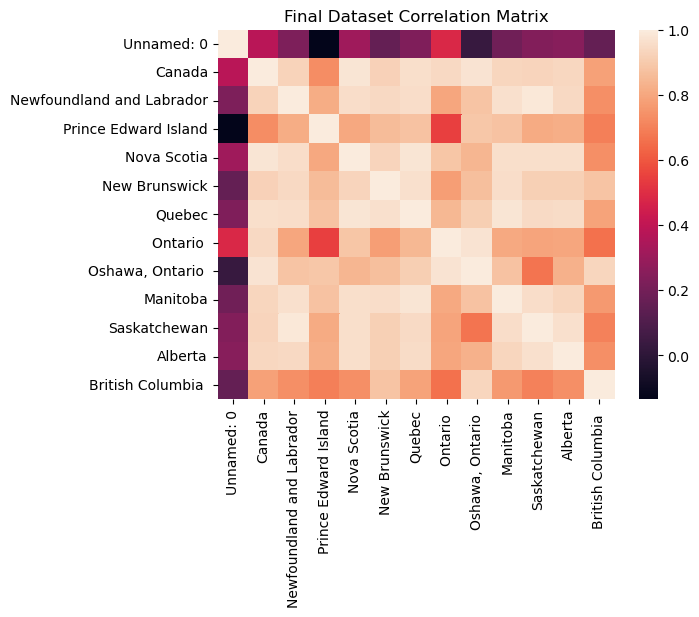

In [18]:
sns.heatmap(fdf.corr()).set(title="Final Dataset Correlation Matrix")

### Comments

    This heatmap is much clearer than my previous one, and I can pull a bit more information out of it. The HPI values appear to still grow similarly across provinces, but we can see now that Ontario and Prince Edward Island seem to be less correlated than the rest, suggesting they may be the regions that differ the most. I'd like to take a look at the HPI & population over time for both.

In [ ]:
sns.lineplot(data=fdf, x="year", y="Ontario").set(title="HPI Over Years in Ontario")
sns.lineplot(data=fdf, x="year", y="Ontario").set(title="HPI Over Years in Quebec")